In [1]:
import numpy as np
import pandas as pd
import random as rn
import matplotlib.pyplot as plt

In [128]:
x=[]
for i in range(100):
    x.append(np.random.randint(0,700,2)) #generates random 2 element array with values between 0 and 700
x

[array([ 38, 283]),
 array([131,  44]),
 array([514, 508]),
 array([391,  41]),
 array([625, 545]),
 array([ 87, 443]),
 array([178, 556]),
 array([536, 576]),
 array([447,  18]),
 array([302, 104]),
 array([546, 168]),
 array([223, 595]),
 array([26, 27]),
 array([529,  87]),
 array([421, 604]),
 array([385, 460]),
 array([503, 129]),
 array([527, 198]),
 array([616,  46]),
 array([442, 202]),
 array([ 74, 539]),
 array([ 16, 390]),
 array([686, 287]),
 array([504, 378]),
 array([189, 296]),
 array([371, 632]),
 array([249, 685]),
 array([ 34, 569]),
 array([141, 118]),
 array([533, 145]),
 array([567, 697]),
 array([392,  30]),
 array([320, 543]),
 array([423,  31]),
 array([127, 147]),
 array([186, 553]),
 array([578, 646]),
 array([588, 518]),
 array([534,   8]),
 array([441, 591]),
 array([  2, 387]),
 array([158, 186]),
 array([169, 696]),
 array([163, 352]),
 array([173,  89]),
 array([136, 502]),
 array([333, 380]),
 array([ 40, 354]),
 array([382, 445]),
 array([ 70, 663]),
 a

In [129]:
x_np=np.asarray(x)

In [130]:
x_np[:,0]

array([ 38, 131, 514, 391, 625,  87, 178, 536, 447, 302, 546, 223,  26,
       529, 421, 385, 503, 527, 616, 442,  74,  16, 686, 504, 189, 371,
       249,  34, 141, 533, 567, 392, 320, 423, 127, 186, 578, 588, 534,
       441,   2, 158, 169, 163, 173, 136, 333,  40, 382,  70, 625, 474,
       523, 565,  92, 225, 682, 564, 379, 242, 431, 257, 659, 505, 351,
       170,  37, 124, 564, 364, 615,  61, 646,  94, 511, 584, 615, 597,
       419, 280, 335, 106, 267, 671, 432, 596, 110, 455, 649, 337, 174,
        36, 668, 620, 641, 327, 279, 645, 616, 418])

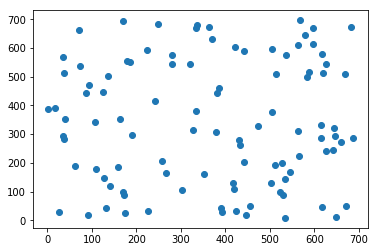

In [131]:
plt.scatter(x_np[:,0],x_np[:,1])

### K means

In [132]:
def distance(x,y):
    return(np.linalg.norm(x-y))

In [133]:
def initial_seeds_selection(x,k):
    seeds=[]
    max_dis=0
    seeds.append(rn.choice(x))
    for i in range(k-1):
        for j in range(len(x)):
            dis=distance(seeds[len(seeds)-1],x[j])
            if(dis>max_dis):
                max_dis=dis
                pt=x[j]
        seeds.append(pt)
    return(seeds)

In [134]:
seeds=initial_seeds_selection(x,3)

In [135]:
seeds

[array([ 40, 354]), array([682, 675]), array([26, 27])]

In [136]:
def kmeans(x,k,maxiter):
    a=[] #the centroid array
    dm=np.zeros((k,len(x)))#initialize distance matrix
    a = initial_seeds_selection(x,k)  #to select k random data points as initial seeds
    for itervar in range(maxiter):
        cls=[] #cluster array
        for i in range(k):
            cls.append([]) #initialize cluster array of k arrays
        for i in range(len(a)):
            for j in range(len(x)):
                    dm[i][j]=distance(a[i],x[j]) #distance matrix generation
        for i in range(len(dm)):
            for j in range(len(x)):
                if((min(dm[:,j:j+1])==dm[i][j])):
                    cls[i].append(x[j]) #appending minimum distance data point to corresponding cluster  
        for i in range(k):
            a[i]=np.array(cls[i]).mean(axis=0) #assign corresponding meanpoint as the new centroid
    return(cls)

In [137]:
cls=kmeans(x,5,10)

In [161]:
cls

[[array([ 38, 283]),
  array([ 87, 443]),
  array([178, 556]),
  array([223, 595]),
  array([ 74, 539]),
  array([ 16, 390]),
  array([189, 296]),
  array([371, 632]),
  array([249, 685]),
  array([ 34, 569]),
  array([320, 543]),
  array([186, 553]),
  array([  2, 387]),
  array([169, 696]),
  array([163, 352]),
  array([136, 502]),
  array([333, 380]),
  array([ 40, 354]),
  array([ 70, 663]),
  array([242, 415]),
  array([ 37, 513]),
  array([124, 448]),
  array([364, 674]),
  array([ 94, 473]),
  array([280, 576]),
  array([335, 670]),
  array([106, 343]),
  array([337, 681]),
  array([ 36, 295]),
  array([279, 545])],
 [array([131,  44]),
  array([391,  41]),
  array([447,  18]),
  array([302, 104]),
  array([546, 168]),
  array([26, 27]),
  array([529,  87]),
  array([503, 129]),
  array([527, 198]),
  array([616,  46]),
  array([442, 202]),
  array([141, 118]),
  array([533, 145]),
  array([392,  30]),
  array([423,  31]),
  array([127, 147]),
  array([534,   8]),
  array([158, 